In [21]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from PIL import Image

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split


In [23]:
!pip install kaggle

In [24]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
print("the dataset is extracted")

the dataset is extracted


In [27]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [28]:
with_mask_files=os.listdir('/content/data/with_mask')

In [29]:
without_mask_files=os.listdir('/content/data/without_mask')

In [30]:
print(with_mask_files[0:5])

['with_mask_2682.jpg', 'with_mask_2207.jpg', 'with_mask_1971.jpg', 'with_mask_2059.jpg', 'with_mask_526.jpg']


In [31]:
len(with_mask_files)

3725

In [32]:
len(without_mask_files)

3828

In [33]:
print(without_mask_files[0:5])

['without_mask_1534.jpg', 'without_mask_2744.jpg', 'without_mask_2385.jpg', 'without_mask_598.jpg', 'without_mask_2229.jpg']


# **Creating Labels**

In [34]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [35]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [36]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


(459, 365, 3)


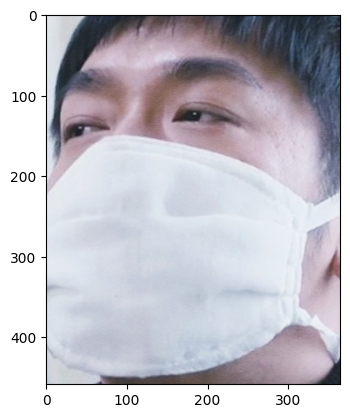

In [37]:
## displaying with mask images..
import matplotlib.image as mpimg
img=mpimg.imread('/content/data/with_mask/with_mask_139.jpg')
plt.imshow(img)
print(img.shape)

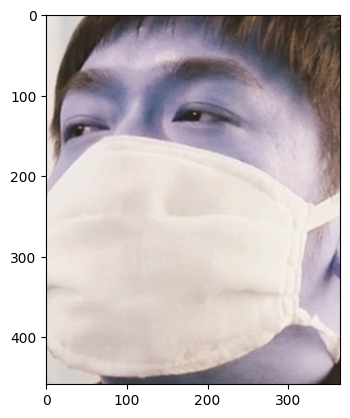

In [38]:
## using opencv.
input_image=cv2.imread('/content/data/with_mask/with_mask_139.jpg')
plt.imshow(input_image)

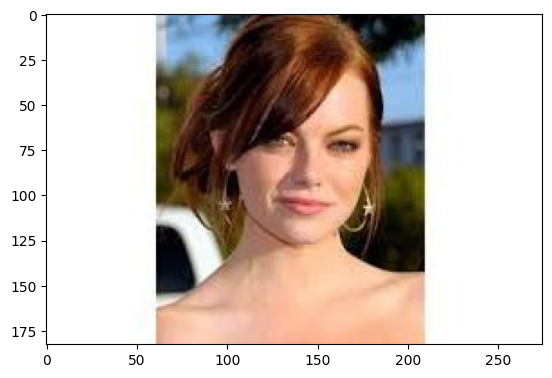

In [39]:
img=mpimg.imread('/content/data/without_mask/without_mask_1425.jpg')
plt.imshow(img)

image processing
1. Resizing the image
2. converting the image to numpy array

In [53]:
## converting a image to numpy array
with_mask_path='/content/data/with_mask/'
data=[]
for i in with_mask_files:
  image=Image.open(with_mask_path+i)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'

for i in without_mask_files: # Corrected from with_mask_files to without_mask_files
  image=Image.open(without_mask_path+i)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [54]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 252],
        [255, 254, 252],
        [255, 254, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [154, 153, 151],
        [157, 155, 153],
        [157, 155, 154]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [128, 122, 122],
        [130, 124, 124],
        [134, 129, 128]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 24,  25,  22],
        [ 34,  32,  30],
        [ 45,  41,  40]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 28,  27,  25],
        [ 40,  36,  35],
        [ 45,  37,  37]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 36,  34,  33],
        [ 48,  41,  42],
        [ 55,  44,  45]]], dtype=uint8)
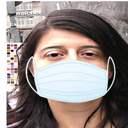

In [55]:
data[9]

In [57]:
data[0].shape

(128, 128, 3)

In [56]:
x=np.array(data)
y=np.array(labels)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
x_train_scaled=x_train/255 # for faster training.
x_test_scaled=x_test/255

In [63]:
x_train_scaled

array([[[[0.11372549, 0.08235294, 0.05490196],
         [0.16862745, 0.11764706, 0.07843137],
         [0.14901961, 0.10588235, 0.07843137],
         ...,
         [0.97254902, 0.98039216, 0.97647059],
         [0.96862745, 0.97647059, 0.97254902],
         [0.97254902, 0.98039216, 0.97647059]],

        [[0.17647059, 0.13333333, 0.08627451],
         [0.17647059, 0.1254902 , 0.08235294],
         [0.10980392, 0.07058824, 0.04705882],
         ...,
         [0.97254902, 0.98039216, 0.97647059],
         [0.96862745, 0.97647059, 0.97254902],
         [0.97254902, 0.98039216, 0.97647059]],

        [[0.18823529, 0.12941176, 0.08627451],
         [0.1254902 , 0.07843137, 0.04705882],
         [0.10980392, 0.07843137, 0.05882353],
         ...,
         [0.97254902, 0.98039216, 0.97647059],
         [0.97254902, 0.98039216, 0.97647059],
         [0.97254902, 0.98039216, 0.97647059]],

        ...,

        [[0.27843137, 0.18431373, 0.13333333],
         [0.31764706, 0.20784314, 0.17254902]

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization

In [74]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
history=model.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_test_scaled,y_test))

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.8081 - loss: 0.8203 - val_accuracy: 0.6770 - val_loss: 0.8675
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8962 - loss: 0.3278 - val_accuracy: 0.7776 - val_loss: 0.7031
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9247 - loss: 0.2271 - val_accuracy: 0.7962 - val_loss: 0.6608
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9428 - loss: 0.1479 - val_accuracy: 0.9226 - val_loss: 0.2030
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9503 - loss: 0.1411 - val_accuracy: 0.9437 - val_loss: 0.1482
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9722 - loss: 0.0755 - val_accuracy: 0.9517 - val_loss: 0.1477
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9770 - loss: 0.0617 - val_accuracy: 0.9490 - val_loss: 0.1566
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9845 - loss: 0.0425 - val_acc

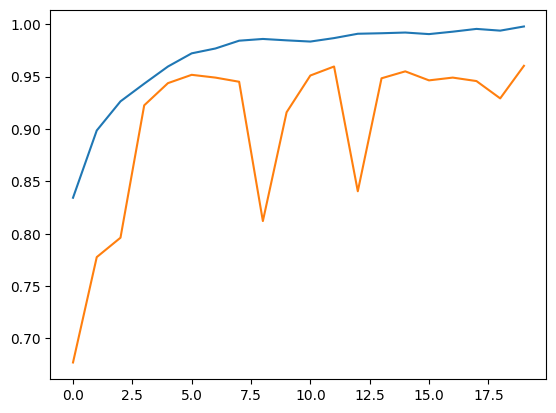

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [121]:
accuracy=model.evaluate(x_test_scaled,y_test)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9625 - loss: 0.1461
[0.1443609744310379, 0.9602912068367004]


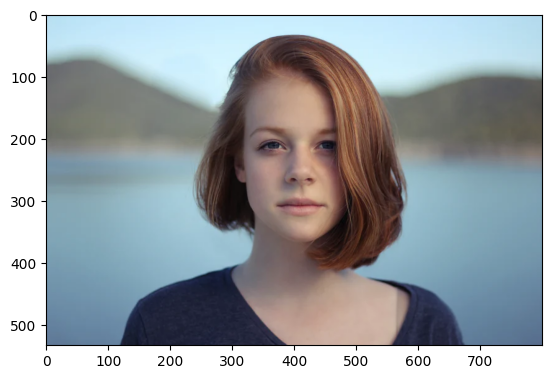

In [127]:
input_image=mpimg.imread('/content/peau-hydrate_CC_81e_800x.webp')
plt.imshow(input_image)

In [128]:
input_img=cv2.resize(input_image,(128,128))
final_img=input_img.reshape((1,128,128,3))

In [129]:
model.predict(final_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)